In [107]:
# import modules (pickle is built in to python)  
import _pickle as cp 
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import pandas as pd


# load data from first file 
X, y = cp.load(open('winequality-white.pickle', 'rb'))


In [108]:
# split the data into test and train partition
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

Trivial prediction:  5.878764675855028


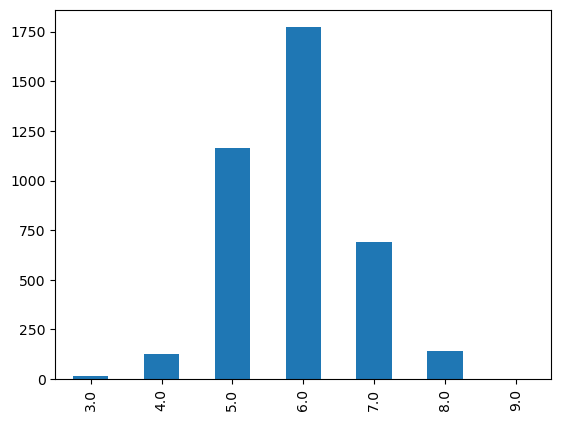

In [109]:
# plot the y values on a bar chart 
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')

# predict the average of the dataset
trivial_pred = np.mean(y_train) 
print("Trivial prediction: ", trivial_pred)

In [110]:
# mean squared error
def mse(actual, predictions) : 
    return np.mean((actual - predictions)**2)


In [111]:
# mse of the trivial prediction (sets the baseline)
print("mse of training data: ", mse(y_train, trivial_pred))
print("mse of test data: ", mse(y_test, trivial_pred))

mse of training data:  0.7767772386501117
mse of test data:  0.8138573000045535


In [114]:
# return the train and test data, normalized and with bias terms
def norm_and_bias(train, test): 
    std, mean = np.std(train, axis = 0), np.mean(train, axis = 0)
    train_norm, test_norm = (train-mean) / std, (test - mean) / std
    ones_train, ones_test = np.ones((len(train), 1)), np.ones((len(test), 1))
    train_final, test_final = np.hstack((ones_train, train)), np.hstack((ones_test, test))
    return train_final, test_final 

# calculate the weights given norm and biased X, with y 
def linear_reg_weights(X, y): 
    Xt = np.transpose(X)
    Xs = np.linalg.inv( Xt @ X) @ Xt
    w = Xs @ y
    return w

# predict y values from data and learned weights 
def linear_reg_pred(X,w): 
    return X @ w  

# calcuate loss function given inputs, actual outputs and weights
# returns mean squared error * 1/2
def linear_reg_loss(X, y, w): 
    error = X@w - y
    return (1/(2*len(X))) * np.transpose(error) @ error

def calc_train_and_test_loss_from_scratch(X_train, X_test, y_train, y_test):
    # normalized and add biases to train and test data
    X_train_norm, X_test_norm = norm_and_bias(X_train, X_test)

    # calculate weights
    w = linear_reg_weights(X_train_norm, y_train)   

    # calculate loss for train and test
    L_train = linear_reg_loss(X_train_norm, y_train, w) 
    L_test = linear_reg_loss(X_test_norm, y_test, w) 

    return L_train, L_test

In [115]:
L_train, L_test = calc_train_and_test_loss_from_scratch(X_train, X_test, y_train, y_test)
# scale loss function by factor of 2 to give MSE
print("MSE for train data: ", 2*L_train)
print("MSE for test data: ", 2*L_test)

MSE for train data:  0.5639996173941932
MSE for test data:  0.5607292041819442


In [ ]:
for i in range(20, 620, 20): 
    X_train_n = X_train[:i]
    y_train_n = y_train[:i]

    L_train, L_test = calc_train_and_test_loss_from_scratch(X_train_n, y_train_n, )